In \[9\]:

    import numpy as np
    from sklearn.datasets import make_blobs
    from matplotlib import pyplot as plt
    from matplotlib.pyplot import figure
    from pandas import DataFrame

    yield_production, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=20)

In \[10\]:

    df = DataFrame(dict(x=yield_production[:,0], y=yield_production[:,1]))
    fig, ax = plt.subplots(figsize=(10,10))
    df.plot(ax=ax, kind='scatter', x='x', y='y')
    plt.xlabel('production')
    plt.ylabel('crop')
    plt.show()

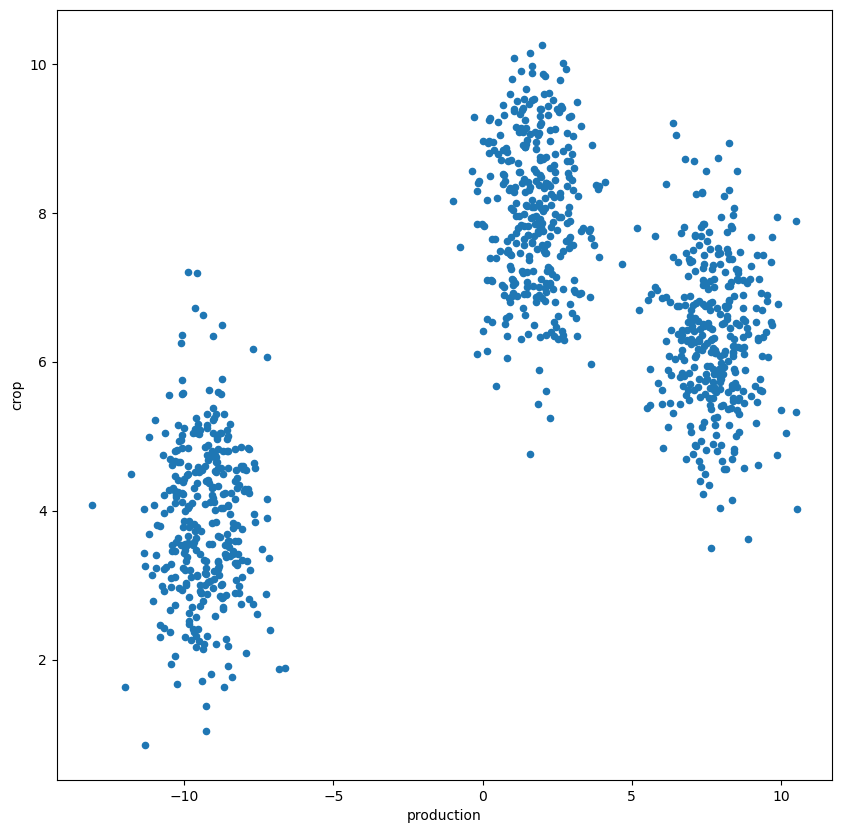

In \[11\]:

    def init_centroids(k, X):
        arr = []
        for i in range(k):
            cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
            cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
            arr.append([cx1, cx2])
        return np.asarray(arr)

In \[12\]:

    def dist(a, b):
        return np.sqrt(sum(np.square(a-b)))

# ASSIGNING CLUSTERS<a href="#ASSIGNING-CLUSTERS" class="anchor-link">¶</a>

In \[13\]:

    def assign_cluster(k, X, cg):
        cluster = [-1]*len(X)
        for i in range(len(X)):
            dist_arr = []
            for j in range(k):
                dist_arr.append(dist(X[i], cg[j]))
            idx = np.argmin(dist_arr)
            cluster[i] = idx
        return np.asarray(cluster)

In \[14\]:

    def compute_centroids(k, X, cluster):
        cg_arr = []
        for i in range(k):
            arr = []
            for j in range(len(X)):
                if cluster[j]==i:
                    arr.append(X[j])
            cg_arr.append(np.mean(arr, axis=0))
        return np.asarray(cg_arr)

In \[15\]:

    def measure_change(cg_prev, cg_new):
        res = 0
        for a,b in zip(cg_prev,cg_new):
            res+=dist(a,b)
        return res

# CLUSTERING USING DATAFRAMES<a href="#CLUSTERING-USING-DATAFRAMES" class="anchor-link">¶</a>

In \[16\]:

    def show_clusters(X, cluster, cg):
        df = DataFrame(dict(x=X[:, 0], y=X[:, 1], label=cluster))
        colors = {0: 'red', 1: 'yellow', 2: 'pink'}
        fig, ax = plt.subplots(figsize=(8, 8))
        grouped = df.groupby('label')
        for key, group in grouped:
            group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
        ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
        plt.xlabel('X_1')
        plt.ylabel('X_2')
        plt.show()

# K-MEANS<a href="#K-MEANS" class="anchor-link">¶</a>

In \[17\]:

    def k_means(k, X):
        cg_prev = init_centroids(k, X)
        cluster = [0]*len(X)
        cg_change = 100
        while cg_change>.001:
            cluster = assign_cluster(k, X, cg_prev)
            show_clusters(X, cluster, cg_prev)
            cg_new = compute_centroids(k, X, cluster)
            cg_change = measure_change(cg_new, cg_prev)
            cg_prev = cg_new
        return cluster

    cluster = k_means(3, yield_production)

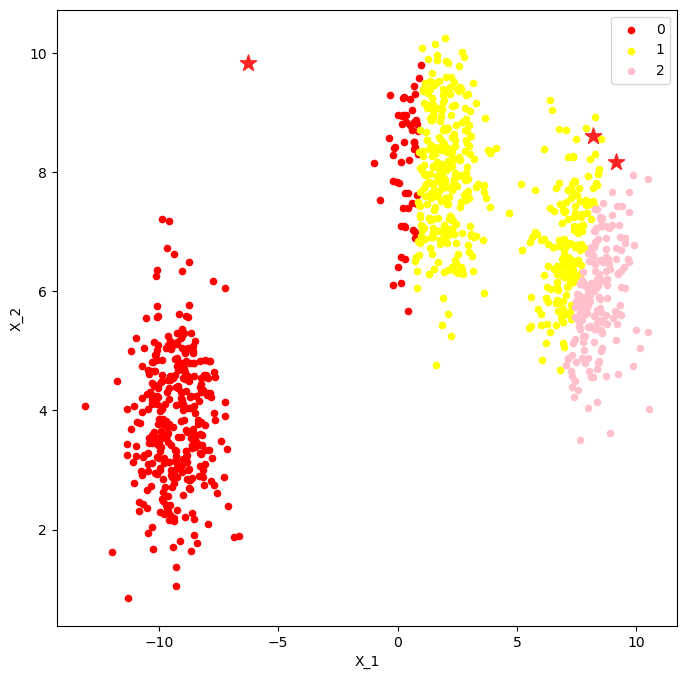

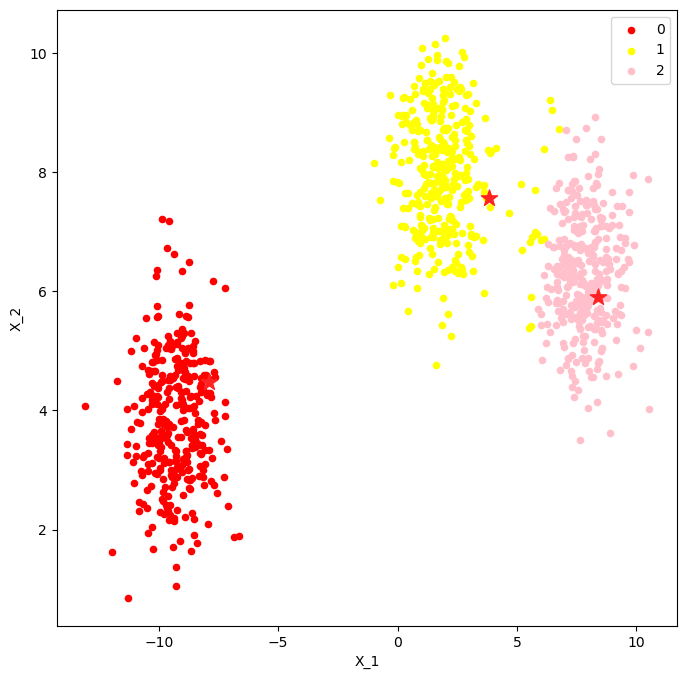

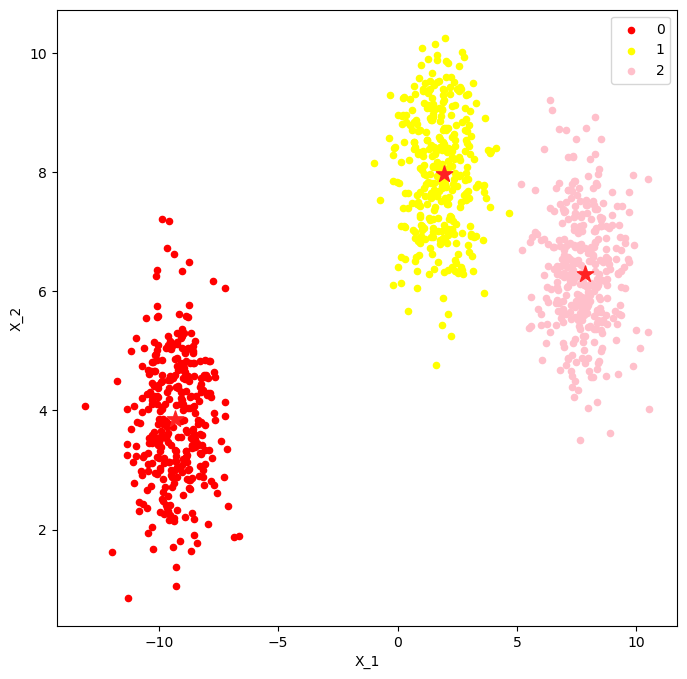

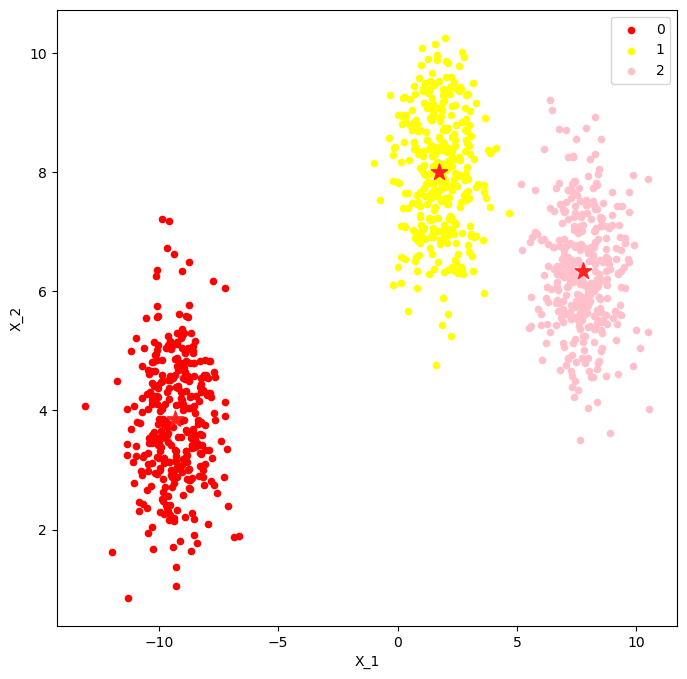

In \[ \]: